In [33]:
#pip install --upgrade jupyterlab jupyterlab-git
#alias pip=pip3

pip install --git+https://github.com/sat28/githubcommit.git

jupyter serverextension enable --py githubcommit

jupyter nbextension install --py githubcommit --user

jupyter nbextension enable githubcommit --user --py

SyntaxError: invalid syntax (<ipython-input-33-e4191d56eeae>, line 4)

In [4]:
#pip install tabula-py
import tabula

In [7]:
pdf_path = "gakii_mpesa.pdf"

In [8]:
# Use tabula to extract tables from the PDF
tables = tabula.read_pdf(pdf_path, pages='all')# Use tabula to extract tables from the PDF

Got stderr: Dec 24, 2023 1:13:29 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Dec 24, 2023 1:13:33 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [12]:
tables[:1]

[Empty DataFrame
 Columns: [Unnamed: 0, Unnamed: 1]
 Index: []]

In [13]:
import pandas as pd

In [14]:
sample_table=tables[2]
sample_table.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,Unnamed: 0
0,RLA8RUF8QM,2023-12-10 17:09:01,Merchant Payment Online to\r7142800 - Naivas ...,Completed,NaN,-695.00,660.29,NaN
1,RLA7RP08WZ,2023-12-10 16:23:56,Merchant Payment Online to\r703081 - WINPEN LTD,Completed,NaN,"-5,500.00","1,355.29",NaN
2,RLA5RLKFRZ,2023-12-10 15:53:38,Business Payment from 329299 -\rSTANDARD CHART...,Completed,"5,000.00",NaN,"6,855.29",NaN
3,RLA4QJGZ9E,2023-12-10 09:36:42,Customer Transfer of Funds\rCharge,Completed,NaN,-7.00,"1,955.29",NaN
4,RLA4QJGZ9E,2023-12-10 09:36:42,Customer Transfer to -\r2547******779 JANET MW...,Completed,NaN,-500.00,"1,962.29",NaN


In [15]:
tables[2].shape[1]

8

In [16]:
#I want to remove the tables I don't need using the number of columns
# Specify the desired number of columns for the tables you need
desired_num_columns = 8 

In [17]:
#filter table based on the number of columns
filtered_tables = []
for i in range(len(tables)):
        if tables[i].shape[1] == desired_num_columns:
            filtered_tables.append(tables[i])

In [18]:
# Combine filtered tables into one data frame
combined_filtered_df = pd.concat(filtered_tables, ignore_index=True)
combined_filtered_df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,Unnamed: 0
0,RLA8RUF8QM,2023-12-10 17:09:01,Merchant Payment Online to\r7142800 - Naivas ...,Completed,NaN,-695.00,660.29,NaN
1,RLA7RP08WZ,2023-12-10 16:23:56,Merchant Payment Online to\r703081 - WINPEN LTD,Completed,NaN,"-5,500.00","1,355.29",NaN
2,RLA5RLKFRZ,2023-12-10 15:53:38,Business Payment from 329299 -\rSTANDARD CHART...,Completed,"5,000.00",NaN,"6,855.29",NaN
3,RLA4QJGZ9E,2023-12-10 09:36:42,Customer Transfer of Funds\rCharge,Completed,NaN,-7.00,"1,955.29",NaN
4,RLA4QJGZ9E,2023-12-10 09:36:42,Customer Transfer to -\r2547******779 JANET MW...,Completed,NaN,-500.00,"1,962.29",NaN


In [19]:
combined_filtered_df.shape

(1616, 8)

In [20]:
combined_filtered_df.to_csv('gakii_mpesa_statement.csv',index=False)

In [21]:
#data cleaning and wrangling
import copy
df=combined_filtered_df

In [22]:
#dropping the unnamed last column
df.drop(columns='Unnamed: 0',inplace=True)

In [23]:
#separating date Completion time into date and time
d=df['Completion Time'].str.split(' ',expand=True)

#labelling the new created object columns
d.rename(columns={0:'date',1:'time'},inplace=True)

#converting into date and time types
d['date']=pd.to_datetime(d['date'],format='%Y-%m-%d')

#converting time into a time object
d['time']=pd.to_datetime(d['time'],format='%H:%M:%S')
d['time']=d['time'].dt.time

d.head()

,date,time
0,2023-12-10,17:09:01
1,2023-12-10,16:23:56
2,2023-12-10,15:53:38
3,2023-12-10,09:36:42
4,2023-12-10,09:36:42


In [24]:
#merging back to the original data set
df=pd.merge(df,d,on=df.index)
df.head()

,key_0,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,date,time
0,0,RLA8RUF8QM,2023-12-10 17:09:01,Merchant Payment Online to\r7142800 - Naivas ...,Completed,NaN,-695.00,660.29,2023-12-10,17:09:01
1,1,RLA7RP08WZ,2023-12-10 16:23:56,Merchant Payment Online to\r703081 - WINPEN LTD,Completed,NaN,"-5,500.00","1,355.29",2023-12-10,16:23:56
2,2,RLA5RLKFRZ,2023-12-10 15:53:38,Business Payment from 329299 -\rSTANDARD CHART...,Completed,"5,000.00",NaN,"6,855.29",2023-12-10,15:53:38
3,3,RLA4QJGZ9E,2023-12-10 09:36:42,Customer Transfer of Funds\rCharge,Completed,NaN,-7.00,"1,955.29",2023-12-10,09:36:42
4,4,RLA4QJGZ9E,2023-12-10 09:36:42,Customer Transfer to -\r2547******779 JANET MW...,Completed,NaN,-500.00,"1,962.29",2023-12-10,09:36:42


In [25]:
#try a summary of transactions per day
transactions_per_day=df['date'].value_counts()
transactions_per_day[:4]

2022-09-26    18
2023-05-30    17
2023-07-15    16
2022-08-01    16
Name: date, dtype: int64

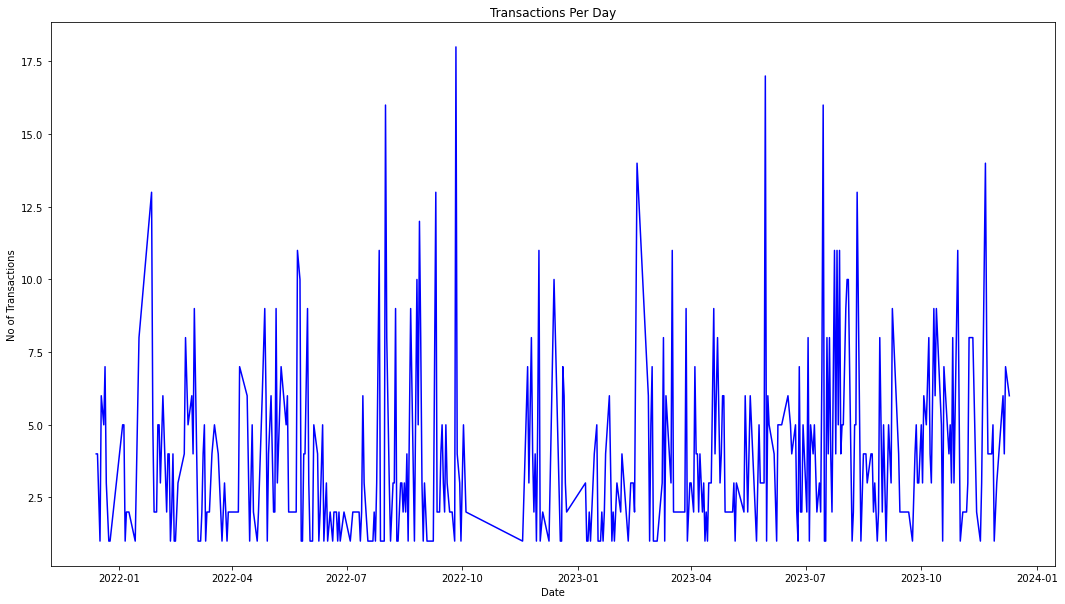

In [26]:
#next plot this as a line plot date versus number of transactions
import matplotlib.pyplot as plt
from datetime import datetime

transactions_per_day=transactions_per_day.sort_index()

plt.figure(figsize=(18,10))
plt.plot(transactions_per_day.index,transactions_per_day.values,
        linestyle='-',color='b')

#format the x axis as dates
#plt.gca().xaxis_data()

#set labels and title
plt.xlabel('Date')
plt.ylabel('No of Transactions')
plt.title('Transactions Per Day')

#show the plot
plt.show()

In [28]:
df.head(2)

,key_0,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,date,time
0,0,RLA8RUF8QM,2023-12-10 17:09:01,Merchant Payment Online to\r7142800 - Naivas ...,Completed,NaN,-695.00,660.29,2023-12-10,17:09:01
1,1,RLA7RP08WZ,2023-12-10 16:23:56,Merchant Payment Online to\r703081 - WINPEN LTD,Completed,NaN,"-5,500.00","1,355.29",2023-12-10,16:23:56
